In [26]:
!pip install py-elvis
!pip install pyyaml==5.4

#!pip install pandas
# !pip install networkx
# !pip install scipy
# !pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [28]:
import pandas as pd
import numpy as np
import datetime
import random
import yaml

In [29]:
from elvis.config import ScenarioConfig, ScenarioRealisation
from elvis.simulate import simulate
from elvis.utility.elvis_general import create_time_steps
from elvis.set_up_infrastructure import wallbox_infrastructure

In [30]:
from google.colab import drive
drive.mount('/content/drive')

current_folder = 'drive/My Drive/DAI-Labor/RL_VPP_Thesis/'

input_folder = current_folder + 'data/config_builder/'
output_folder = current_folder + 'data/elvis_output_data_0/'
#tst = os.listdir(input_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Choose one test case and comment out all others

In [31]:
# case = 'customer_parking_night.yaml'
# case = 'customer_parking_day.yaml'

# case = 'office.yaml'
# case = 'office_fleet.yaml'

#case = 'residential.yaml'
#case = 'wohnblock.yaml'
#case = 'wohnblock_2_household.yaml'
#case = 'wohnblock_household.yaml'
case = 'wohnblock_household_simulation.yaml'

# case = 'gasstation_speedway.yaml'
# case = 'tankstelle_city.yaml'

# case = 'cabstand.yaml'
# case = 'roadside.yaml'
# case = 'PnR.yaml'

with open(input_folder + case, 'r') as file:
    yaml_str = yaml.full_load(file)

n_charging_points = len(yaml_str["infrastructure"]["transformers"][0]["charging_stations"])
config = ScenarioConfig.from_yaml(yaml_str)

Config settings

In [32]:
print(config)
print("Number of charging stations: ", n_charging_points)

Vehicle types: <generator object ScenarioConfig.__str__.<locals>.<genexpr> at 0x7f7dd864e8d0>Mean parking time: 12
Std deviation of parking time: 4
Mean value of the SOC distribution: 0.4
Std deviation of the SOC distribution: 0.3
Max parking time: 24
Number of charging events per week: 22
Vehicles are disconnected only depending on their parking time
Queue length: 0
Opening hours: None
Scheduling policy: Uncontrolled

Number of charging stations:  6


In [33]:
start_date = '2017-01-01T00:00:00'
end_date = '2018-01-01T00:00:00'
resolution = '0:15:00'
realisation = config.create_realisation(start_date, end_date, resolution)
result = simulate(realisation)

Progress: 0.0 %
Progress: 5.0 %
Progress: 10.0 %
Progress: 15.0 %
Progress: 20.0 %
Progress: 25.0 %
Progress: 30.0 %
Progress: 35.0 %
Progress: 40.0 %
Progress: 45.0 %
Progress: 50.0 %
Progress: 55.0 %
Progress: 60.0 %
Progress: 65.0 %
Progress: 70.0 %
Progress: 75.0 %
Progress: 80.0 %
Progress: 85.0 %
Progress: 90.0 %
Progress: 95.0 %


#### Load profile
No preload considered.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


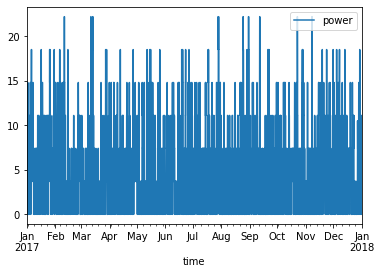

In [34]:
import pandas as pd
from elvis.utility.elvis_general import num_time_steps

start = realisation.start_date
end = realisation.end_date
res = realisation.resolution
load_profile = result.aggregate_load_profile(num_time_steps(start, end, res))
EV_load_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), load_profile))

EV_load_dataframe.rename(columns={0: 'time', 1: 'power'}, inplace=True) #kW
EV_load_dataframe.set_index('time', inplace=True)
EV_load_dataframe.info()
EV_load_dataframe.plot()

In [35]:
EV_load_profile_csv = EV_load_dataframe.to_csv((output_folder+'EV_load_simulate_year_15.csv'), index = True)
#EV_load_profile_csv = EV_load_dataframe.to_csv('output_data_0/EV_load.csv', index = True)

#Charging events generator

In [36]:
#print(realisation.charging_events)
#charging_events = result.create_charging_events(num_time_steps(start, end, res))
#EV_load_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), load_profile))

# charging_events = realisation.charging_events
# j=1
# for charging_event in charging_events:
#     #print( type(charging_event.id), charging_event.id)
#     charging_event.id = 'Charging event: ' + str(j)
#     print( charging_event, '\n')
#     j += 1

for j in range(len(realisation.charging_events)):
    #print( type(charging_event.id), charging_event.id)
    realisation.charging_events[j].id = 'Charging event: ' + str(j+1)
    print(realisation.charging_events[j], '\n')

charging_events = realisation.charging_events


Charging event: 1, Arrival time: 2017-01-01 01:15:00, Parking_time: 13.715238535350668, Leaving_time: 2017-01-01 14:57:54.858727, SOC: 0.3649957622962558, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 2, Arrival time: 2017-01-01 13:45:00, Parking_time: 9.187067658054518, Leaving_time: 2017-01-01 22:56:13.443569, SOC: 0.47276368155745835, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 3, Arrival time: 2017-01-01 16:30:00, Parking_time: 21.67103487280889, Leaving_time: 2017-01-02 14:10:15.725542, SOC: 0.8257499136396487, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 4, Arrival time: 2017-01-01 19:00:00, Parking_time: 6.744093088863252, Leaving_time: 2017-01-02 01:44:38.735120, SOC: 0.4810449259118487, SOC target: 1.0, Connected car: Tesla, Model S 

Charging event: 5, Arrival time: 2017-01-01 19:45:00, Parking_time: 12.836729741884469, Leaving_time: 2017-01-02 08:35:12.227071, SOC: 0.6347513967130676, SOC target: 1.0, Connected car:

In [37]:
import json

import math

time_serie = create_time_steps(start, end, res)
energy_resources = []
avail_EVs_id = []
charging_stations_pw = []
avail_EVs = []

for i in range(len(time_serie)):
    energy_resources.append(np.zeros(n_charging_points))
    avail_EVs_id.append(np.zeros(n_charging_points))
    charging_stations_pw.append(np.zeros(n_charging_points))
    avail_EVs.append([])

Avail_energy_df = pd.DataFrame({'time':time_serie, "Available_energy_sources" : energy_resources, "EVs_id": avail_EVs_id, "Charging_stations_pw": charging_stations_pw, "EVs": avail_EVs})
Avail_energy_df['time'] = pd.to_datetime(Avail_energy_df['time'])

Avail_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      35041 non-null  datetime64[ns]
 1   Available_energy_sources  35041 non-null  object        
 2   EVs_id                    35041 non-null  object        
 3   Charging_stations_pw      35041 non-null  object        
 4   EVs                       35041 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ MB


In [38]:
%%time
charging_power = 3.7 #kW
#soc_rate = 0.005 #battery%/minute

counter = 0
EV_energy_leavings = []

for charging_event in charging_events:
    #charging_event = (charging_event.to_json())
    charging_event = ({'id':(charging_event.id), 'Arrival_time':(charging_event.arrival_time),'Parking_time':(charging_event.parking_time), 'Leaving_time':(charging_event.leaving_time), 'SOC':(charging_event.soc), 'SOC_target':(charging_event.soc_target),'Connected_car':(charging_event.vehicle_type)})

    arrival_time_i = charging_event['Arrival_time']
    hours_parking_time = float(charging_event['Parking_time'])
    parking_time_i = math.modf(hours_parking_time)[1]*60 + (math.modf(math.modf(hours_parking_time)[0]*60)[1]-(math.modf(math.modf(hours_parking_time)[0]*60)[1]%5))
    leaving_time_i = charging_event['Leaving_time']

    

    vehicle_id = int(charging_event['id'][16:])
    
    vehicle_i = charging_event['Connected_car'].to_dict()
    soc_i = charging_event['SOC']
    battery_i = vehicle_i['battery']
    efficiency_i  = battery_i['efficiency']
    capacity_i  = battery_i['capacity'] #kWh
    energy_i = soc_i * capacity_i #kWh
    EV_left = False
    
    for j in range(len(time_serie)):
      counter += 1

      if time_serie[j] == arrival_time_i:
        Avail_energy_t = Avail_energy_df.iat[j,1]
        for n in range(len(Avail_energy_t)):
          if Avail_energy_t[n] == 0:
            station_n = n
            break

      if time_serie[j] >= arrival_time_i and time_serie[j] <= leaving_time_i:
        #Evaluating Energy levels
        Avail_energy_df.iat[j,3][station_n] = 1
        charging_time = time_serie[j] - arrival_time_i
        energy_eval = energy_i + ((charging_time.total_seconds()/3600) * charging_power)* efficiency_i#kWh

        if energy_eval >= capacity_i:
          energy_eval = capacity_i
        #UPDATING TABLE
        Avail_energy_x = Avail_energy_df.Available_energy_sources[j]
        Avail_energy_x[station_n] = energy_eval
        Avail_energy_df.iat[j,1] = Avail_energy_x
        Evs_id_x = Avail_energy_df.EVs_id[j]
        Evs_id_x[station_n] = vehicle_id
        Avail_energy_df.iat[j,2] = Evs_id_x

        Avail_EV_x = Avail_energy_df.EVs[j]
        Avail_EV_x.append({"vehicle_id":vehicle_id, "energy":energy_eval, "station_n": station_n})
        Avail_energy_df.iat[j,4] = Avail_EV_x
              
      if time_serie[j] >= leaving_time_i and EV_left == False:
          EV_energy_leavings.append(energy_eval)
          EV_left = True
  
print("made iterations: ", counter)
Avail_energy_df.head()

made iterations:  40227068
CPU times: user 1min 32s, sys: 1.21 s, total: 1min 33s
Wall time: 1min 35s


In [39]:
Avail_energy_df.tail()

,time,Available_energy_sources,EVs_id,Charging_stations_pw,EVs
35036,2017-12-31 23:00:00,"[0.0, 100.0, 100.0, 0.0, 0.0, 0.0]","[0.0, 1147.0, 1148.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]","[{'vehicle_id': 1147, 'energy': 100, 'station_..."
35037,2017-12-31 23:15:00,"[0.0, 100.0, 100.0, 0.0, 0.0, 0.0]","[0.0, 1147.0, 1148.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]","[{'vehicle_id': 1147, 'energy': 100, 'station_..."
35038,2017-12-31 23:30:00,"[0.0, 100.0, 100.0, 0.0, 0.0, 0.0]","[0.0, 1147.0, 1148.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]","[{'vehicle_id': 1147, 'energy': 100, 'station_..."
35039,2017-12-31 23:45:00,"[0.0, 100.0, 100.0, 0.0, 0.0, 0.0]","[0.0, 1147.0, 1148.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]","[{'vehicle_id': 1147, 'energy': 100, 'station_..."
35040,2018-01-01 00:00:00,"[0.0, 100.0, 100.0, 0.0, 0.0, 0.0]","[0.0, 1147.0, 1148.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0]","[{'vehicle_id': 1147, 'energy': 100, 'station_..."


In [40]:
print("EV number leaving the stations: ", len(EV_energy_leavings))
print(EV_energy_leavings)

EV number leaving the stations:  1146
[86.44957622962559, 80.57636815574584, 100, 72.15449259118488, 100, 40.48429377059661, 58.275000000000006, 95.84434230902238, 86.60139389818339, 69.63502808364565, 47.42930815147137, 56.77052305033253, 94.75036186636719, 57.33446667051812, 92.4849607681555, 90.56525839601467, 100, 81.55122568460786, 77.15085842571483, 100, 37.925000000000004, 100, 59.29185831082805, 100, 100, 97.19178208244583, 64.25751458678928, 53.37890498271079, 44.130349964227484, 88.91212265988707, 100, 55.88163048159019, 54.25517212980022, 86.74744521874041, 100, 69.05413494453478, 78.25930287176477, 100, 94.53183228220405, 100, 73.33453229562988, 100, 76.74282014955674, 80.00986375091577, 34.225, 100, 100, 52.921428148494904, 100, 73.48553969342278, 100, 100, 77.74143689730613, 100, 100, 50.875, 100, 100, 74.0722493670468, 41.17960156582403, 66.37750635062048, 41.86204144455337, 77.98823990731994, 88.99476302676753, 92.46213045453422, 100, 32.92768364249194, 85.1668948191066

In [41]:
Avail_energy_csv = Avail_energy_df.to_csv((output_folder+'Avail_energy_simulation_year_15.csv'), index = True)

Transforming CSV file in table for plotting

In [42]:
# Avail_energy_csv_data = pd.read_csv((output_folder+'Avail_energy_simulation_year.csv'))
# Avail_energy_csv_data = Avail_energy_csv_data.iloc[:,1:]
# Avail_energy_csv_data['time'] = pd.to_datetime(Avail_energy_csv_data['time'])

# import ast


# energy_init = []
# for j in range(len(time_serie)):
#     energy_init.append(0.00)


# for j in range(len(time_serie)):
#     timestep_x = Avail_energy_csv_data.Available_energy_sources[j]
#     if type(timestep_x) == str:
#         timestep_x = ast.literal_eval(timestep_x)
#     if len(timestep_x) != 0:

#         for vehicle in timestep_x:
#             id = str(vehicle['vehicle_id'])
#             if str(vehicle['vehicle_id']) in Avail_energy_csv_data.columns:
#                 Avail_energy_csv_data.iat[ j, int(id)+1] = vehicle['energy']
#             else:
                
#                 Avail_energy_i_column = pd.DataFrame({id : energy_init})
#                 Avail_energy_i_column.iat[j, 0] = vehicle['energy']
                
#                 Avail_energy_csv_data = pd.concat((Avail_energy_csv_data, Avail_energy_i_column), axis=1)



# Avail_energy_csv_data.info()


In [43]:
# Avail_energy_csv_table = Avail_energy_csv_data.to_csv((output_folder+'Avail_energy_simulation_table_year.csv'), index = True)
# Avail_energy_csv_data = Avail_energy_csv_data.set_index("time")
# Avail_energy_csv_data = Avail_energy_csv_data.iloc[:,1:]

# Avail_energy_csv_data.plot()

Storage profile

In [44]:

""" storage_profile = result.get_storage_profile(num_time_steps(start, end, res))
EV_storage_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), storage_profile))

EV_storage_dataframe.rename(columns={0: 'time', 1: 'storage'}, inplace=True) #kW
EV_storage_dataframe.set_index('time', inplace=True)

EV_storage_dataframe.plot() """

" storage_profile = result.get_storage_profile(num_time_steps(start, end, res))\nEV_storage_dataframe = pd.DataFrame(zip(create_time_steps(start, end, res), storage_profile))\n\nEV_storage_dataframe.rename(columns={0: 'time', 1: 'storage'}, inplace=True) #kW\nEV_storage_dataframe.set_index('time', inplace=True)\n\nEV_storage_dataframe.plot() "

In [45]:
""" EV_storage_profile_csv = EV_storage_dataframe.to_csv('generated_data/EV_storage_test.csv', index = True) """

" EV_storage_profile_csv = EV_storage_dataframe.to_csv('generated_data/EV_storage_test.csv', index = True) "

Charging time Histogram

#### Arrival distribution

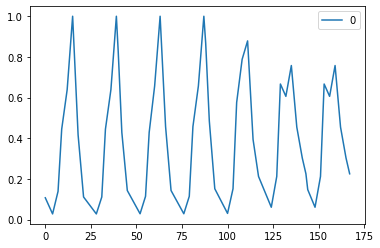

In [46]:
pd.DataFrame(yaml_str['arrival_distribution']).plot()

Max power in kW

In [47]:
result.max_load()

22.2

Max simultaneity

In [48]:
result.simultaneity_factor(infrastructure=realisation.infrastructure)

1.0

In [49]:
result.simultaneity_factor(infrastructure=realisation.infrastructure, bins=[0., 1e-20,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

[(10678, 0.0),
 (52, 1e-20),
 (11254, 0.1),
 (55, 0.2),
 (7081, 0.3),
 (49, 0.4),
 (3540, 0.5),
 (1697, 0.6),
 (15, 0.7),
 (556, 0.8),
 (64, 0.9)]

Simultaneity factor over time

In [50]:
""" total_power = result.get_power_charging_points(config.infrastructure) #ye ye name refactor will come
sf = EV_load_dataframe/total_power
sf.plot() """

' total_power = result.get_power_charging_points(config.infrastructure) #ye ye name refactor will come\nsf = EV_load_dataframe/total_power\nsf.plot() '